목표 : 기초통계량, 상관분석(+유의성 검정),Q-Qplot
=====================

import modules

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations

환경설정

In [2]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format) # 소수점 3개까지 출력

load file

In [4]:
unlisted = pd.read_csv("./비상장후보피처.csv")
# 영업년수가 있더라

# describe

In [22]:
unlisted

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
0,(주)CMG제약,58820,2022,19,79,2,6,617,520,15,...,23.000,-716.667,1614.563,60479.048,3632.941,0.000,0,0,1,0
1,(주)ES큐브,50120,2020,3,270,3,24,62,60,929,...,22.000,-0.202,1089.064,-2022.628,938.209,1.000,0,0,0,1
2,(주)MH에탄올,23150,2022,6,9,5,19,28,23,369,...,28.000,8.717,588.595,3407.741,507.129,0.000,0,1,0,0
3,(주)강원에너지,114190,2018,-16,-28,-7,-8,162,161,87,...,15.000,21.077,838.689,-4138.892,490.136,1.000,1,0,0,0
4,(주)고려시멘트,198440,2022,0,7,0,0,402,335,25,...,10.000,-9.794,696.142,-5781.497,1088.800,0.000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,(주)한중엔시에스,107640,2016,2,2,1,1,83,58,363,...,11.000,-10.445,1047753.961,18230918.925,268881.490,1.000,0,0,1,0
727,도부마스크 (주),227420,2018,-28,-77,-18,-21,139,139,169,...,8.000,-1.147,796145.536,-5380708.257,342291.871,1.000,0,0,0,1
728,에이치엔에스하이텍(주),44990,2021,13,44,6,5,189,150,99,...,9.000,7.601,2047153.005,16297442.427,885738.679,1.000,0,0,1,0
729,에이펙스인텍(주),207490,2022,3,4,2,2,123,89,219,...,6.000,309.091,3549369.291,5973645.681,1154390.267,0.000,0,0,1,0


In [23]:
unlisted.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,부실판단,도입기,성숙기,성장기,쇠퇴기
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,...,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,136485.349,2019.681,8.167,1272.220,-0.018,-2.743,299.781,248.044,122.133,95.819,...,15.402,-12.492,828706.580,-59581.392,421888.643,0.503,0.283,0.304,0.215,0.198
std,125026.425,3.012,51.058,23030.585,13.794,41.623,383.778,356.115,368.257,332.637,...,9.547,1004.117,19538609.316,6186722.582,9127352.329,0.500,0.451,0.460,0.411,0.399
min,40.000,2014.000,-606.000,-5211.000,-255.000,-620.000,4.000,3.000,0.000,0.000,...,0.000,-18475.906,-41590963.719,-48253995.691,0.000,0.000,0.000,0.000,0.000,0.000
25%,49495.000,2017.000,-10.000,-14.000,-4.000,-7.000,103.000,70.000,31.500,20.500,...,8.000,-10.569,921.397,-19862.022,755.621,0.000,0.000,0.000,0.000,0.000
50%,100660.000,2022.000,2.000,2.000,1.000,2.000,167.000,124.000,69.000,48.000,...,14.000,-1.046,1507.177,3458.297,1524.945,1.000,0.000,0.000,0.000,0.000
75%,214220.000,2022.000,18.000,37.000,6.000,10.000,327.500,261.000,129.000,99.500,...,22.000,16.487,2844.279,15128.207,3104.285,1.000,1.000,1.000,0.000,0.000
max,900340.000,2022.000,259.000,611057.000,44.000,90.000,3542.000,3246.000,9039.000,8254.000,...,56.000,8800.000,524652402.569,119828057.745,246199224.745,1.000,1.000,1.000,1.000,1.000


In [24]:
unlisted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                731 non-null    object 
 1   거래소코드              731 non-null    int64  
 2   회계년도               731 non-null    int64  
 3   CASH FLOW 대 부채비율   731 non-null    int64  
 4   CASH FLOW 대 차입금비율  731 non-null    int64  
 5   CASH FLOW 대 총자본비율  731 non-null    int64  
 6   CASH FLOW 대 매출액비율  731 non-null    int64  
 7   유동비율               731 non-null    int64  
 8   당좌비율               731 non-null    int64  
 9   부채비율               731 non-null    int64  
 10  유동부채비율             731 non-null    int64  
 11  차입금의존도             731 non-null    int64  
 12  순운전자본비율            731 non-null    int64  
 13  현금비율               731 non-null    int64  
 14  유동자산구성비율           731 non-null    int64  
 15  자기자본구성비율           731 non-null    int64  
 16  자기자본순이익률           731 non

In [25]:
unlisted.columns

Index(['회사명', '거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률',
       '매출액정상영업이익률', '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율',
       '비유동자산증가율', '매출액증가율', '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '부가가치율', '이윤분배율', '자본분배율', '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율',
       '경영자본회전률', '총자본회전률', '비유동자산회전률', '유동자산회전률', '영업년수', '상장년수', 'PER',
       'PBR', 'PCR', 'PSR', '부실판단', '도입기', '성숙기', '성장기', '쇠퇴기'],
      dtype='object')

In [26]:
unlisted.isna().sum().sort_values(ascending=False)

회사명                  0
총자본회전률               0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
매출채권회전률              0
당좌자산회전률              0
유형자산회전율              0
경영자본회전률              0
비유동자산회전률             0
매출액증가율               0
유동자산회전률              0
영업년수                 0
상장년수                 0
PER                  0
PBR                  0
PCR                  0
PSR                  0
부실판단                 0
도입기                  0
성숙기                  0
성장기                  0
유형자산증가율              0
비유동자산증가율             0
거래소코드                0
현금비율                 0
회계년도                 0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
유동자산구성비율             0
유동자산증가율              0
자기자본구성비율   

In [27]:
unlisted.isin([0]).sum().sort_values(ascending=False)

쇠퇴기                  586
성장기                  574
도입기                  524
성숙기                  509
부실판단                 363
총자본회전률               267
경영자본회전률              178
자본분배율                109
이윤분배율                107
비유동자산회전률              71
유동자산회전률               68
당좌자산회전률               53
차입금의존도                48
CASH FLOW 대 총자본비율     28
CASH FLOW 대 차입금비율     22
유형자산회전율               20
비유동자산증가율              18
매출액증가율                17
유형자산증가율               17
총자본증가율                17
유동자산증가율               17
CASH FLOW 대 매출액비율     12
현금비율                  11
CASH FLOW 대 부채비율       8
순운전자본비율                6
PBR                    6
PSR                    6
PCR                    6
유동부채비율                 6
PER                    6
부채비율                   5
자기자본순이익률               4
자기자본구성비율               4
총자본투자효율                4
CROE                   3
부가가치율                  3
매출채권회전률                2
총자산회전율                 1
설비투자효율                 1
상장년수                   1


In [28]:
unlisted.isin([np.inf]).value_counts()

회사명    거래소코드  회계년도   CASH FLOW 대 부채비율  CASH FLOW 대 차입금비율  CASH FLOW 대 총자본비율  CASH FLOW 대 매출액비율  유동비율   당좌비율   부채비율   유동부채비율  차입금의존도  순운전자본비율  현금비율   유동자산구성비율  자기자본구성비율  자기자본순이익률  경영자본순이익률  매출액순이익률  총자본사업이익률  총자본정상영업이익률  매출액정상영업이익률  금융비용부담률  CROE   총자산증가율  총자본증가율  유동자산증가율  비유동자산증가율  매출액증가율  유형자산증가율  부가가치(백만원)  총자본투자효율  설비투자효율  부가가치율  이윤분배율  자본분배율  총자산회전율  매출채권회전률  당좌자산회전률  유형자산회전율  경영자본회전률  총자본회전률  비유동자산회전률  유동자산회전률  영업년수   상장년수   PER    PBR    PCR    PSR    부실판단   도입기    성숙기    성장기    쇠퇴기  
False  False  False  False             False              False              False              False  False  False  False   False   False    False  False     False     False     False     False    False     False       False       False    False  False   False   False    False     False   False    False      False    False   False  False  False  False   False    False    False    False    False   False     False    False  False  False  False  False  False  False  False  False  False  False    731
N

범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7시장지표 및 기타

In [34]:
# 상장 all data는 df1
# 상장 label들

labels = unlisted[
    [
        '거래소코드',
        '회계년도',
        '부실판단',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ]
]

# 상장 피처
features = unlisted.drop(
    labels=[
        '회사명',
        '거래소코드',
        '회계년도'        
    ],
    axis=1,    
)

# 현금흐름 4개
cash_ft1 = unlisted[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '부실판단'
    ]
]

# 안정성 10개
stability_ft1 = unlisted[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율',
        '부실판단'
    ]
]

# 수익성 10개
profitability_ft1 = listed[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본정상영업이익률',
        '매출액정상영업이익률',
        '금융비용부담률',
        'CROE',
        '부실판단'
    ]
]

# 성장성 8개
growth_ft1 = listed[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율',
        '부실판단'
    ]
]

# 생산성 5개
productivity_ft1 = listed[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율',
        '부실판단'
    ]
]

# 활동성 10개
activity_ft1 = listed[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률',
        '부실판단'
    ]
]

# 시장지표 및 기타
etc_ft1 = listed[
    [
        '영업년수',
        '상장년수',            
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ]
]

In [35]:
listed_ft = [cash_ft1, stability_ft1, profitability_ft1, growth_ft1, productivity_ft1, activity_ft1]

# Q-Qplot

In [39]:
def qq_plot(df):
    fig, axes = plt.subplots(13, 5, figsize=(15, 25))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(13):
        for j in range(5):
            col_index = i * 5 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

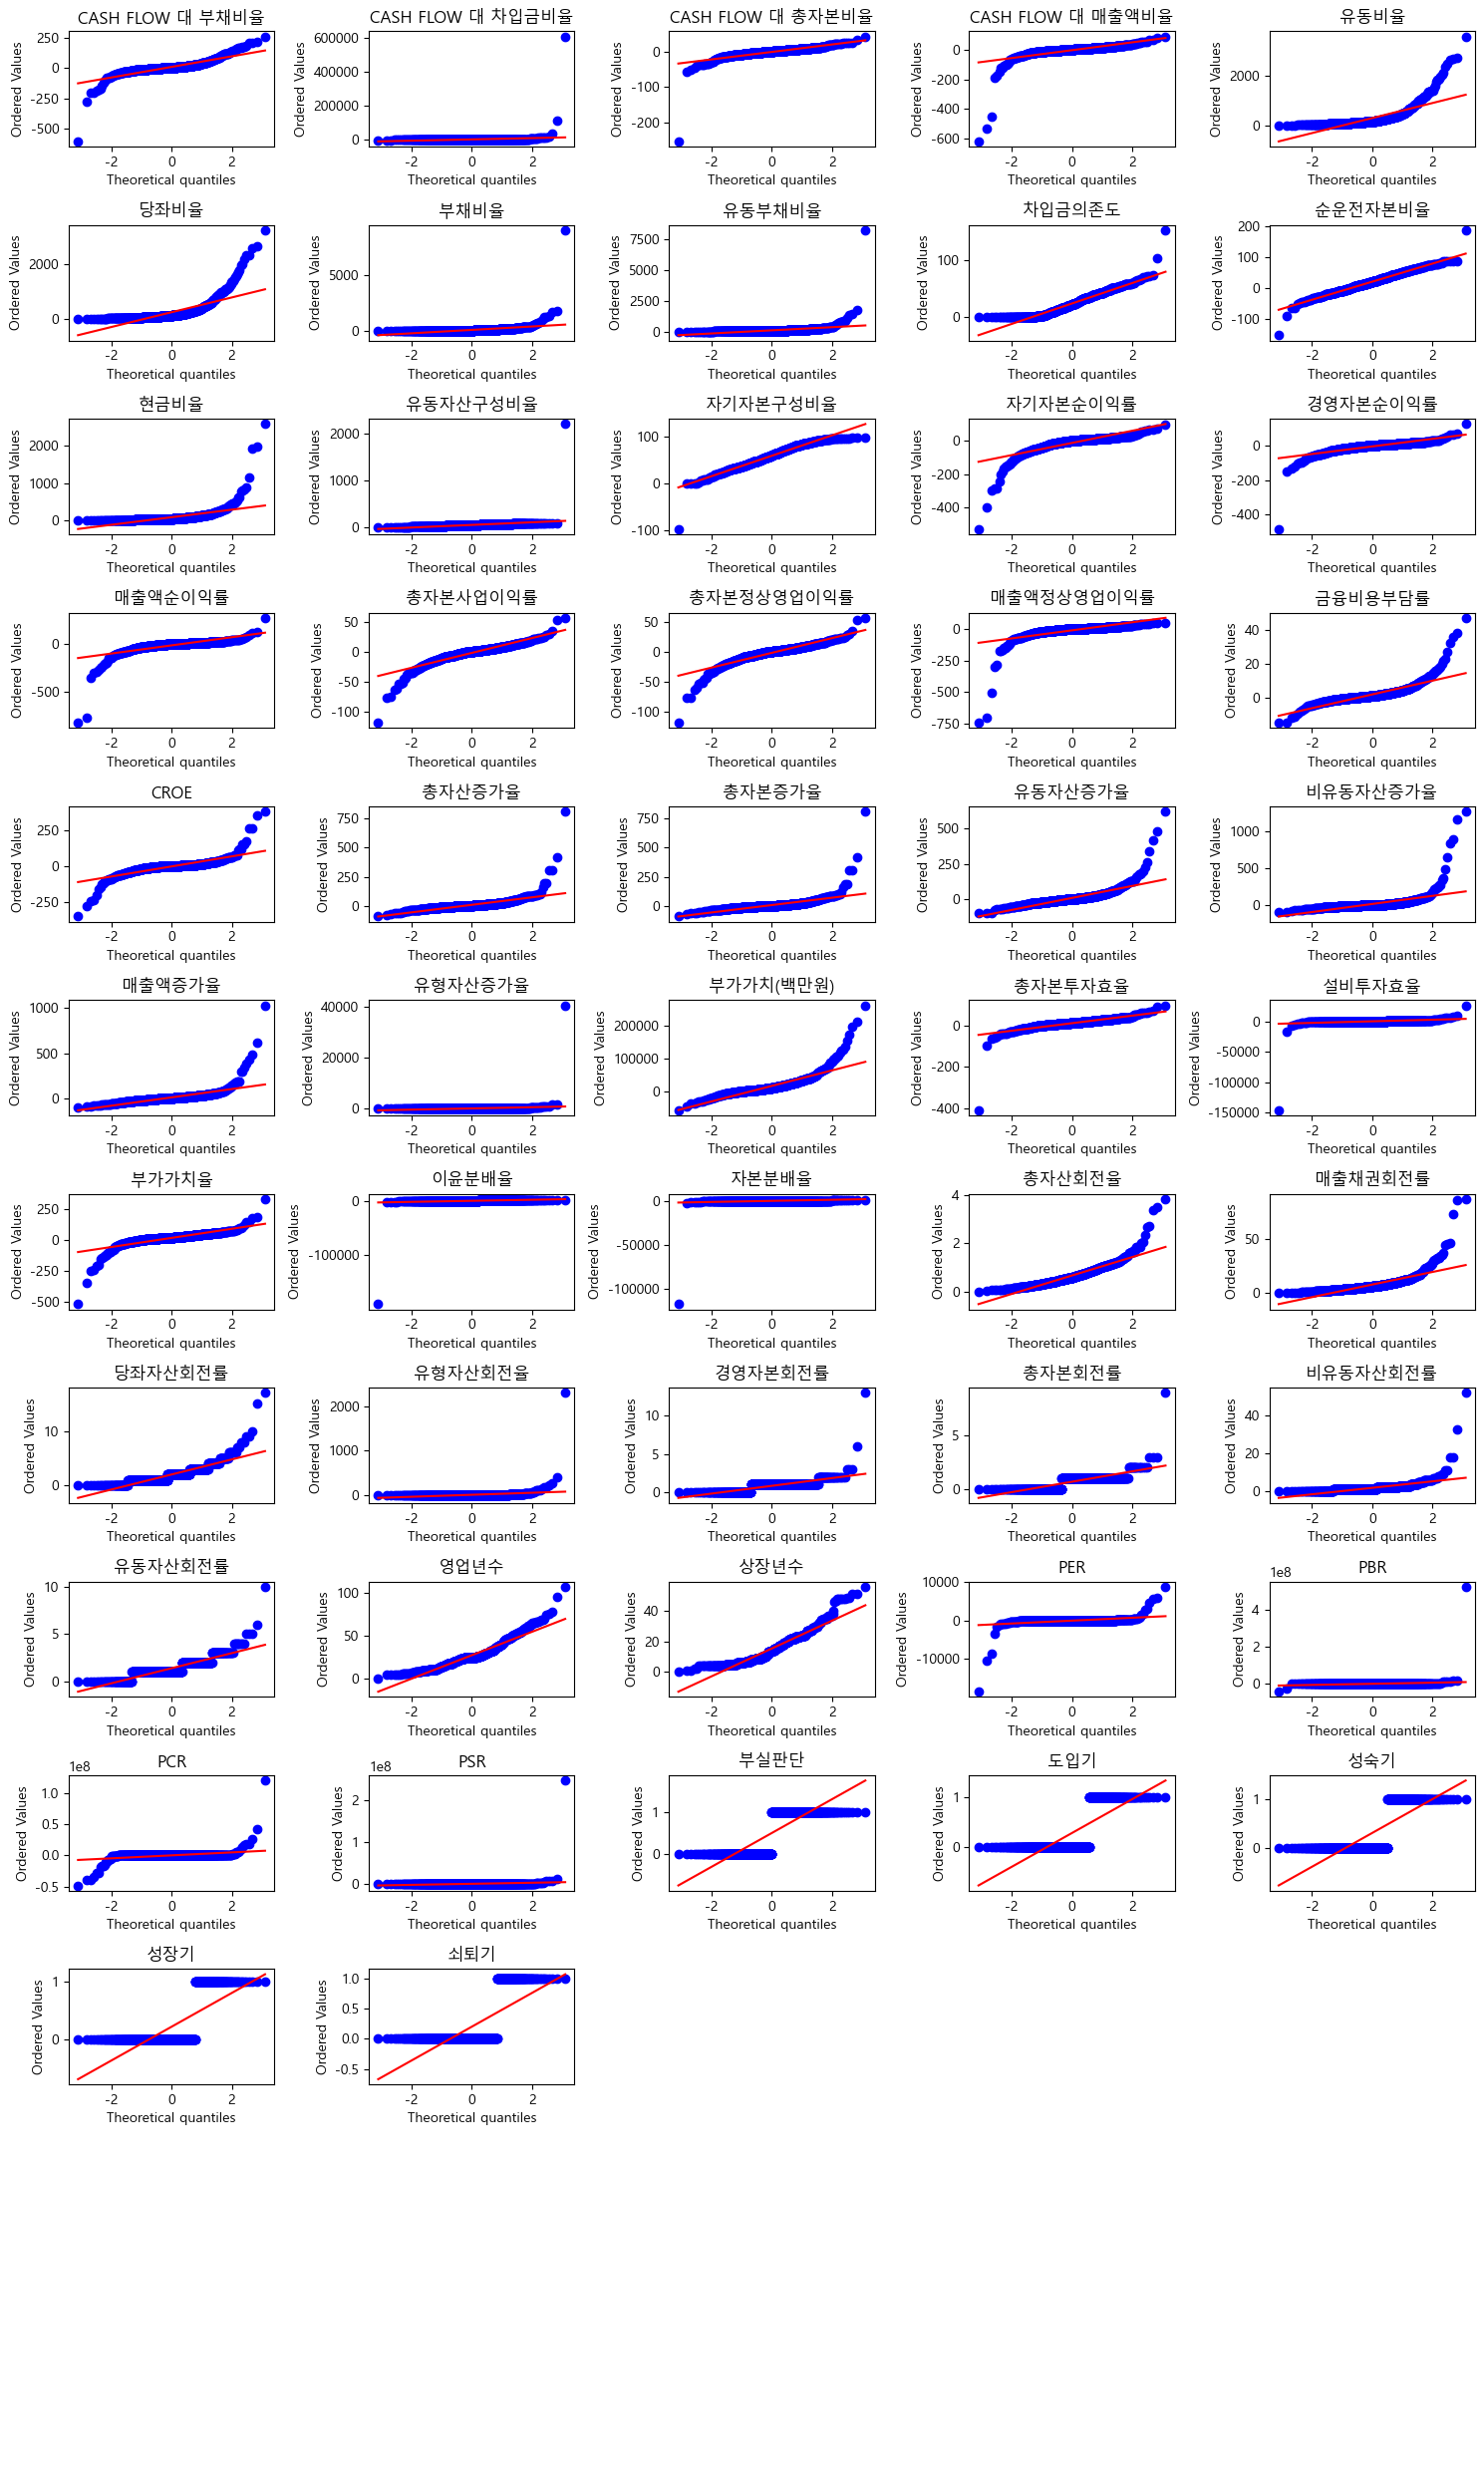

In [40]:
qq_plot(features)

# 상관계수와 유의성 검정

In [41]:
# 상관 계수와 p-value 계산하는 함수
def correlation_and_pval(df):
    columns = df.columns
    corr_dict = {}
    pval_dict = {}
    
    # 모든 특성 쌍에 대한 상관 계수와 p-value 계산
    for col1, col2 in combinations(columns, 2):
        corr, pval = pearsonr(df[col1], df[col2])
        corr_dict[f"{col1}-{col2}"] = corr
        pval_dict[f"{col1}-{col2}"] = pval
    
    return corr_dict, pval_dict

1현금흐름

<Axes: >

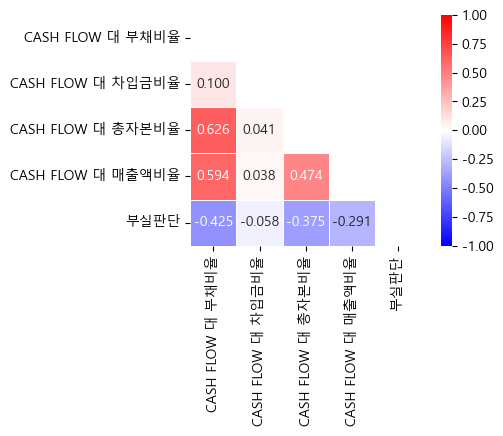

In [42]:
plt.figure(figsize=(5,3))
mask = np.triu(np.ones_like(cash_ft1.corr(), dtype=bool))
sns.heatmap(cash_ft1.corr(),
            vmax=1,
            vmin=-1,
            # center=0,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask) # 좌하방만 표시

In [43]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(cash_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.100
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.626
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.594
CASH FLOW 대 부채비율-부실판단: -0.425
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.041
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.038
CASH FLOW 대 차입금비율-부실판단: -0.058
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.474
CASH FLOW 대 총자본비율-부실판단: -0.375
CASH FLOW 대 매출액비율-부실판단: -0.291
p-value======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.007
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.000
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 부채비율-부실판단: 0.000
CASH FLOW 대 차입금비율-CASH FLOW 대 총자본비율: 0.267
CASH FLOW 대 차입금비율-CASH FLOW 대 매출액비율: 0.304
CASH FLOW 대 차입금비율-부실판단: 0.119
CASH FLOW 대 총자본비율-CASH FLOW 대 매출액비율: 0.000
CASH FLOW 대 총자본비율-부실판단: 0.000
CASH FLOW 대 매출액비율-부실판단: 0.000


In [44]:
np.abs(cash_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단                1.000
CASH FLOW 대 부채비율    0.425
CASH FLOW 대 총자본비율   0.375
CASH FLOW 대 매출액비율   0.291
CASH FLOW 대 차입금비율   0.058
Name: 부실판단, dtype: float64

2안정성

<Axes: >

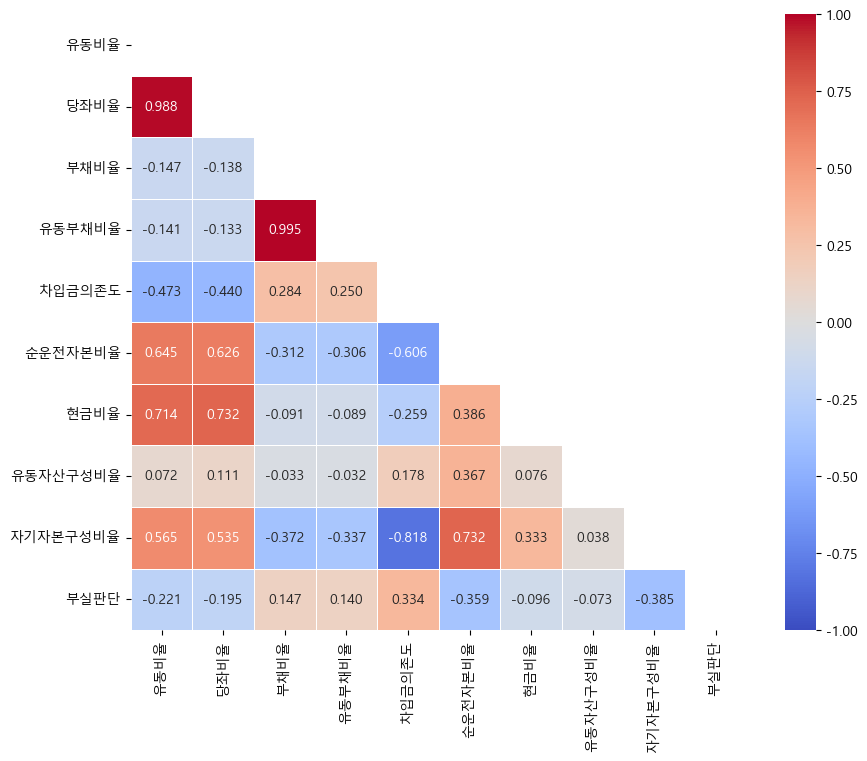

In [45]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

<Axes: >

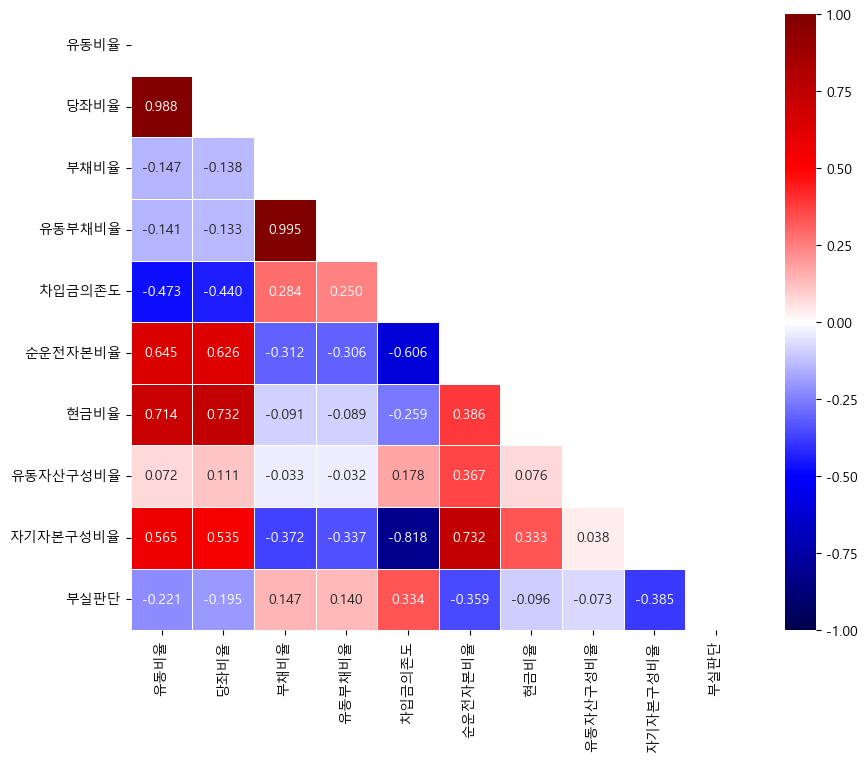

In [46]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='seismic', 
            linewidths=.5, 
            mask = mask)

<Axes: >

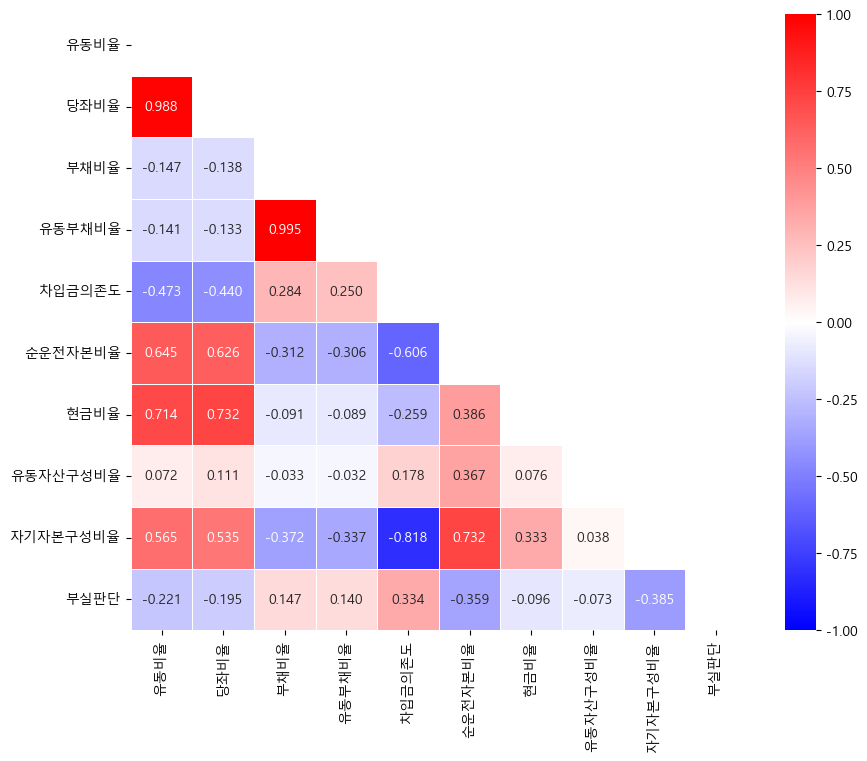

In [47]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(stability_ft1.corr(), dtype=bool))
sns.heatmap(stability_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='bwr', 
            linewidths=.5, 
            mask = mask)

In [48]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(stability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
유동비율-당좌비율: 0.988
유동비율-부채비율: -0.147
유동비율-유동부채비율: -0.141
유동비율-차입금의존도: -0.473
유동비율-순운전자본비율: 0.645
유동비율-현금비율: 0.714
유동비율-유동자산구성비율: 0.072
유동비율-자기자본구성비율: 0.565
유동비율-부실판단: -0.221
당좌비율-부채비율: -0.138
당좌비율-유동부채비율: -0.133
당좌비율-차입금의존도: -0.440
당좌비율-순운전자본비율: 0.626
당좌비율-현금비율: 0.732
당좌비율-유동자산구성비율: 0.111
당좌비율-자기자본구성비율: 0.535
당좌비율-부실판단: -0.195
부채비율-유동부채비율: 0.995
부채비율-차입금의존도: 0.284
부채비율-순운전자본비율: -0.312
부채비율-현금비율: -0.091
부채비율-유동자산구성비율: -0.033
부채비율-자기자본구성비율: -0.372
부채비율-부실판단: 0.147
유동부채비율-차입금의존도: 0.250
유동부채비율-순운전자본비율: -0.306
유동부채비율-현금비율: -0.089
유동부채비율-유동자산구성비율: -0.032
유동부채비율-자기자본구성비율: -0.337
유동부채비율-부실판단: 0.140
차입금의존도-순운전자본비율: -0.606
차입금의존도-현금비율: -0.259
차입금의존도-유동자산구성비율: 0.178
차입금의존도-자기자본구성비율: -0.818
차입금의존도-부실판단: 0.334
순운전자본비율-현금비율: 0.386
순운전자본비율-유동자산구성비율: 0.367
순운전자본비율-자기자본구성비율: 0.732
순운전자본비율-부실판단: -0.359
현금비율-유동자산구성비율: 0.076
현금비율-자기자본구성비율: 0.333
현금비율-부실판단: -0.096
유동자산구성비율-자기자본구성비율: 0.038
유동자산구성비율-부실판단: -0.073
자기자본구성비율-부실판단: -0.385
p-value======================
유동비율-당좌비율: 0.000
유동

In [49]:
np.abs(stability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
자기자본구성비율   0.385
순운전자본비율    0.359
차입금의존도     0.334
유동비율       0.221
당좌비율       0.195
부채비율       0.147
유동부채비율     0.140
현금비율       0.096
유동자산구성비율   0.073
Name: 부실판단, dtype: float64

3수익성

<Axes: >

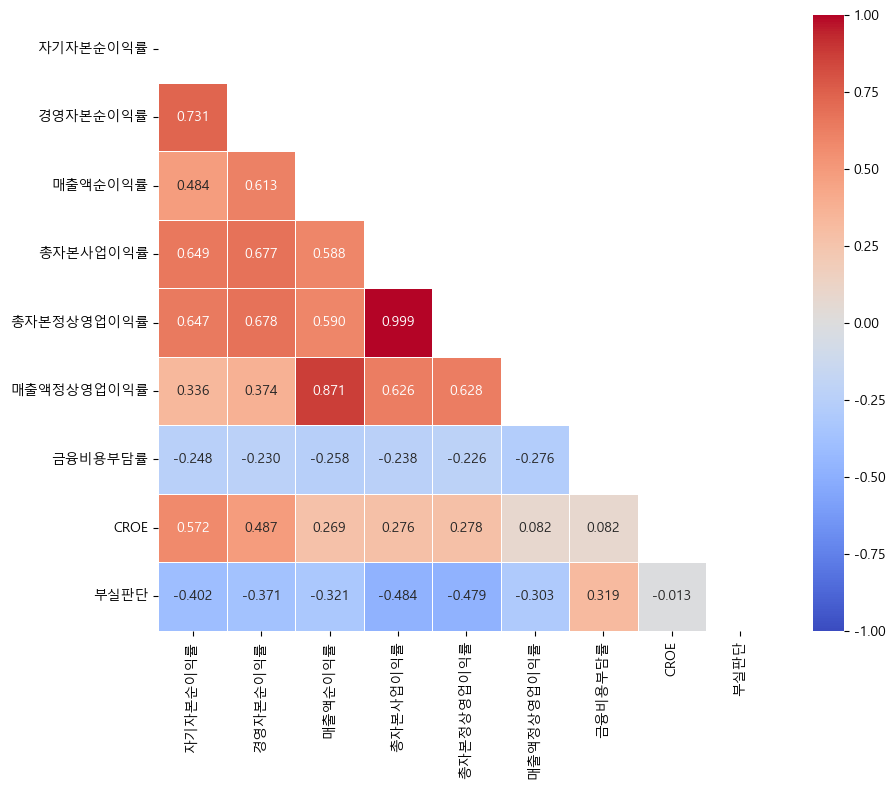

In [50]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(profitability_ft1.corr(), dtype=bool))
sns.heatmap(profitability_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [51]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(profitability_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
자기자본순이익률-경영자본순이익률: 0.731
자기자본순이익률-매출액순이익률: 0.484
자기자본순이익률-총자본사업이익률: 0.649
자기자본순이익률-총자본정상영업이익률: 0.647
자기자본순이익률-매출액정상영업이익률: 0.336
자기자본순이익률-금융비용부담률: -0.248
자기자본순이익률-CROE: 0.572
자기자본순이익률-부실판단: -0.402
경영자본순이익률-매출액순이익률: 0.613
경영자본순이익률-총자본사업이익률: 0.677
경영자본순이익률-총자본정상영업이익률: 0.678
경영자본순이익률-매출액정상영업이익률: 0.374
경영자본순이익률-금융비용부담률: -0.230
경영자본순이익률-CROE: 0.487
경영자본순이익률-부실판단: -0.371
매출액순이익률-총자본사업이익률: 0.588
매출액순이익률-총자본정상영업이익률: 0.590
매출액순이익률-매출액정상영업이익률: 0.871
매출액순이익률-금융비용부담률: -0.258
매출액순이익률-CROE: 0.269
매출액순이익률-부실판단: -0.321
총자본사업이익률-총자본정상영업이익률: 0.999
총자본사업이익률-매출액정상영업이익률: 0.626
총자본사업이익률-금융비용부담률: -0.238
총자본사업이익률-CROE: 0.276
총자본사업이익률-부실판단: -0.484
총자본정상영업이익률-매출액정상영업이익률: 0.628
총자본정상영업이익률-금융비용부담률: -0.226
총자본정상영업이익률-CROE: 0.278
총자본정상영업이익률-부실판단: -0.479
매출액정상영업이익률-금융비용부담률: -0.276
매출액정상영업이익률-CROE: 0.082
매출액정상영업이익률-부실판단: -0.303
금융비용부담률-CROE: 0.082
금융비용부담률-부실판단: 0.319
CROE-부실판단: -0.013
p-value======================
자기자본순이익률-경영자본순이익률: 0.000
자기자본순이익률-매출액순이익률: 0.000
자기자본순이익률-총자본사업이익률: 0.000
자기자

In [52]:
np.abs(profitability_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단         1.000
총자본사업이익률     0.484
총자본정상영업이익률   0.479
자기자본순이익률     0.402
경영자본순이익률     0.371
매출액순이익률      0.321
금융비용부담률      0.319
매출액정상영업이익률   0.303
CROE         0.013
Name: 부실판단, dtype: float64

4유동성

<Axes: >

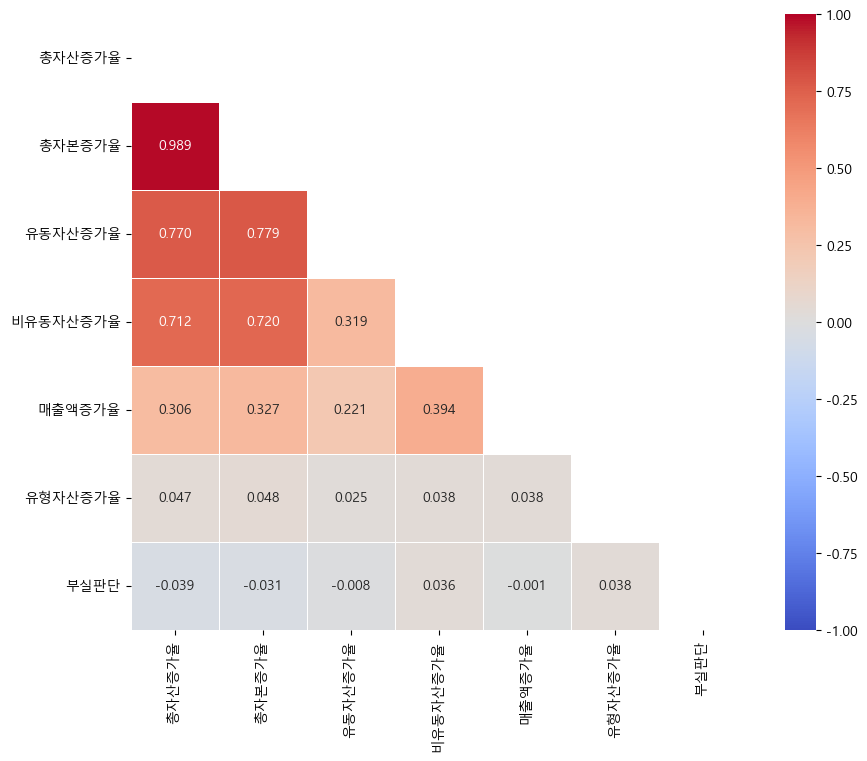

In [53]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(growth_ft1.corr(), dtype=bool))
sns.heatmap(growth_ft1.corr(),
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [54]:
growth_ft1.loc[growth_ft1[growth_ft1['총자산증가율'] == np.inf].index]

,총자산증가율,총자본증가율,유동자산증가율,비유동자산증가율,매출액증가율,유형자산증가율,부실판단


In [55]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(growth_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산증가율-총자본증가율: 0.989
총자산증가율-유동자산증가율: 0.770
총자산증가율-비유동자산증가율: 0.712
총자산증가율-매출액증가율: 0.306
총자산증가율-유형자산증가율: 0.047
총자산증가율-부실판단: -0.039
총자본증가율-유동자산증가율: 0.779
총자본증가율-비유동자산증가율: 0.720
총자본증가율-매출액증가율: 0.327
총자본증가율-유형자산증가율: 0.048
총자본증가율-부실판단: -0.031
유동자산증가율-비유동자산증가율: 0.319
유동자산증가율-매출액증가율: 0.221
유동자산증가율-유형자산증가율: 0.025
유동자산증가율-부실판단: -0.008
비유동자산증가율-매출액증가율: 0.394
비유동자산증가율-유형자산증가율: 0.038
비유동자산증가율-부실판단: 0.036
매출액증가율-유형자산증가율: 0.038
매출액증가율-부실판단: -0.001
유형자산증가율-부실판단: 0.038
p-value======================
총자산증가율-총자본증가율: 0.000
총자산증가율-유동자산증가율: 0.000
총자산증가율-비유동자산증가율: 0.000
총자산증가율-매출액증가율: 0.000
총자산증가율-유형자산증가율: 0.206
총자산증가율-부실판단: 0.290
총자본증가율-유동자산증가율: 0.000
총자본증가율-비유동자산증가율: 0.000
총자본증가율-매출액증가율: 0.000
총자본증가율-유형자산증가율: 0.198
총자본증가율-부실판단: 0.399
유동자산증가율-비유동자산증가율: 0.000
유동자산증가율-매출액증가율: 0.000
유동자산증가율-유형자산증가율: 0.497
유동자산증가율-부실판단: 0.819
비유동자산증가율-매출액증가율: 0.000
비유동자산증가율-유형자산증가율: 0.311
비유동자산증가율-부실판단: 0.334
매출액증가율-유형자산증가율: 0.301
매출액증가율-부실판단: 0.987
유형자산증가율-부실판단: 0.307


In [56]:
np.abs(growth_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
총자산증가율     0.039
유형자산증가율    0.038
비유동자산증가율   0.036
총자본증가율     0.031
유동자산증가율    0.008
매출액증가율     0.001
Name: 부실판단, dtype: float64

5생산성

<Axes: >

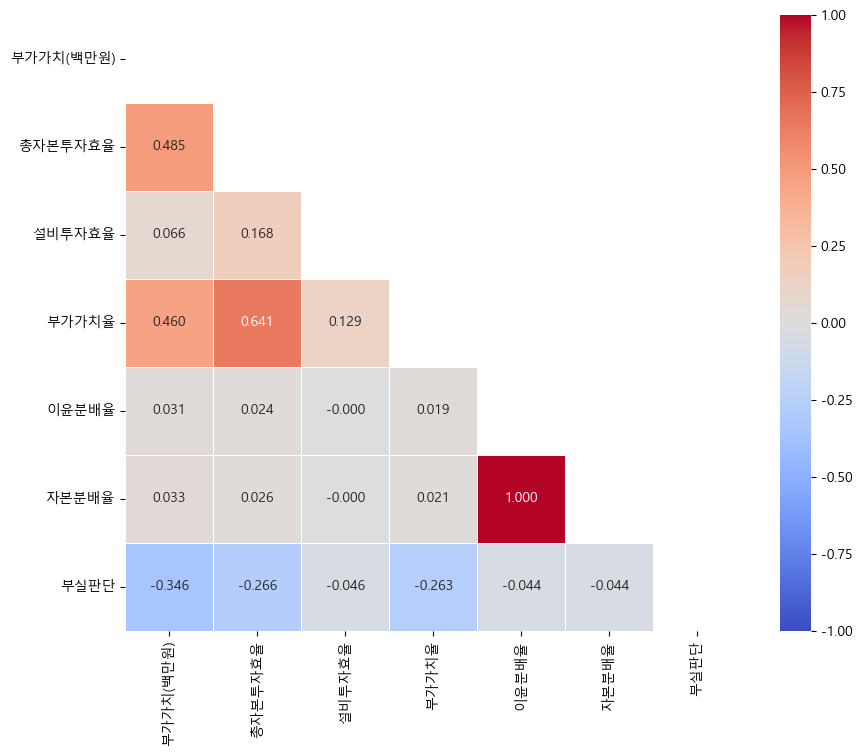

In [57]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(productivity_ft1.corr(), dtype=bool))
sns.heatmap(productivity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 10}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [58]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(productivity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
부가가치(백만원)-총자본투자효율: 0.485
부가가치(백만원)-설비투자효율: 0.066
부가가치(백만원)-부가가치율: 0.460
부가가치(백만원)-이윤분배율: 0.031
부가가치(백만원)-자본분배율: 0.033
부가가치(백만원)-부실판단: -0.346
총자본투자효율-설비투자효율: 0.168
총자본투자효율-부가가치율: 0.641
총자본투자효율-이윤분배율: 0.024
총자본투자효율-자본분배율: 0.026
총자본투자효율-부실판단: -0.266
설비투자효율-부가가치율: 0.129
설비투자효율-이윤분배율: -0.000
설비투자효율-자본분배율: -0.000
설비투자효율-부실판단: -0.046
부가가치율-이윤분배율: 0.019
부가가치율-자본분배율: 0.021
부가가치율-부실판단: -0.263
이윤분배율-자본분배율: 1.000
이윤분배율-부실판단: -0.044
자본분배율-부실판단: -0.044
p-value======================
부가가치(백만원)-총자본투자효율: 0.000
부가가치(백만원)-설비투자효율: 0.073
부가가치(백만원)-부가가치율: 0.000
부가가치(백만원)-이윤분배율: 0.408
부가가치(백만원)-자본분배율: 0.373
부가가치(백만원)-부실판단: 0.000
총자본투자효율-설비투자효율: 0.000
총자본투자효율-부가가치율: 0.000
총자본투자효율-이윤분배율: 0.516
총자본투자효율-자본분배율: 0.481
총자본투자효율-부실판단: 0.000
설비투자효율-부가가치율: 0.000
설비투자효율-이윤분배율: 0.990
설비투자효율-자본분배율: 1.000
설비투자효율-부실판단: 0.214
부가가치율-이윤분배율: 0.608
부가가치율-자본분배율: 0.569
부가가치율-부실판단: 0.000
이윤분배율-자본분배율: 0.000
이윤분배율-부실판단: 0.238
자본분배율-부실판단: 0.235


In [59]:
np.abs(productivity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단        1.000
부가가치(백만원)   0.346
총자본투자효율     0.266
부가가치율       0.263
설비투자효율      0.046
자본분배율       0.044
이윤분배율       0.044
Name: 부실판단, dtype: float64

6활동성

<Axes: >

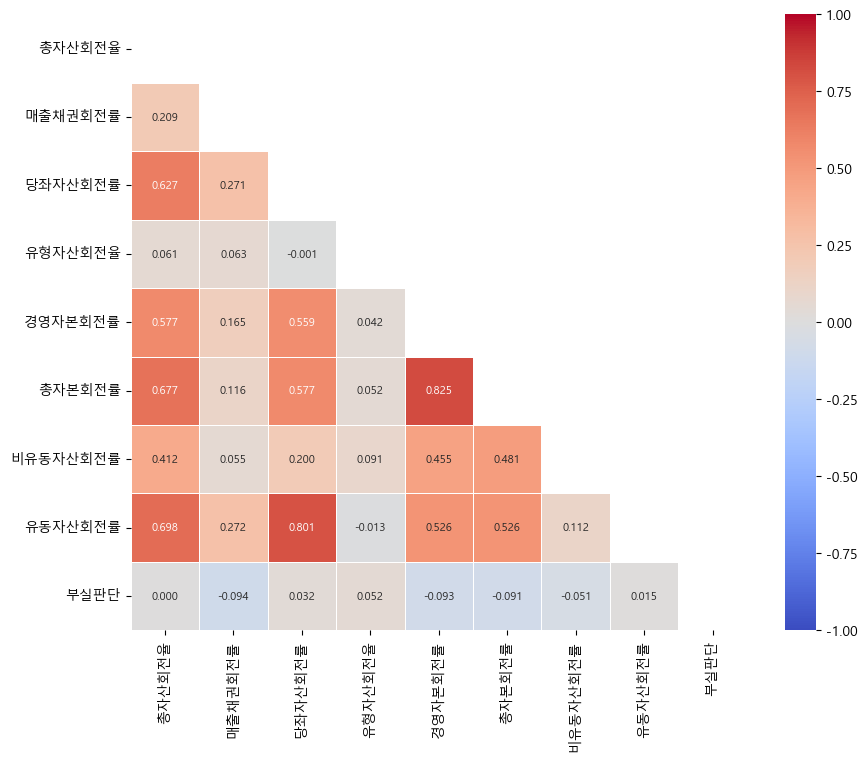

In [60]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(activity_ft1.corr(), dtype=bool))
sns.heatmap(activity_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask)

In [61]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(activity_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
총자산회전율-매출채권회전률: 0.209
총자산회전율-당좌자산회전률: 0.627
총자산회전율-유형자산회전율: 0.061
총자산회전율-경영자본회전률: 0.577
총자산회전율-총자본회전률: 0.677
총자산회전율-비유동자산회전률: 0.412
총자산회전율-유동자산회전률: 0.698
총자산회전율-부실판단: 0.000
매출채권회전률-당좌자산회전률: 0.271
매출채권회전률-유형자산회전율: 0.063
매출채권회전률-경영자본회전률: 0.165
매출채권회전률-총자본회전률: 0.116
매출채권회전률-비유동자산회전률: 0.055
매출채권회전률-유동자산회전률: 0.272
매출채권회전률-부실판단: -0.094
당좌자산회전률-유형자산회전율: -0.001
당좌자산회전률-경영자본회전률: 0.559
당좌자산회전률-총자본회전률: 0.577
당좌자산회전률-비유동자산회전률: 0.200
당좌자산회전률-유동자산회전률: 0.801
당좌자산회전률-부실판단: 0.032
유형자산회전율-경영자본회전률: 0.042
유형자산회전율-총자본회전률: 0.052
유형자산회전율-비유동자산회전률: 0.091
유형자산회전율-유동자산회전률: -0.013
유형자산회전율-부실판단: 0.052
경영자본회전률-총자본회전률: 0.825
경영자본회전률-비유동자산회전률: 0.455
경영자본회전률-유동자산회전률: 0.526
경영자본회전률-부실판단: -0.093
총자본회전률-비유동자산회전률: 0.481
총자본회전률-유동자산회전률: 0.526
총자본회전률-부실판단: -0.091
비유동자산회전률-유동자산회전률: 0.112
비유동자산회전률-부실판단: -0.051
유동자산회전률-부실판단: 0.015
p-value======================
총자산회전율-매출채권회전률: 0.000
총자산회전율-당좌자산회전률: 0.000
총자산회전율-유형자산회전율: 0.101
총자산회전율-경영자본회전률: 0.000
총자산회전율-총자본회전률: 0.000
총자산회전율-비유동자산회전률: 0.000
총자산회전율-유

In [62]:
np.abs(activity_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단       1.000
매출채권회전률    0.094
경영자본회전률    0.093
총자본회전률     0.091
유형자산회전율    0.052
비유동자산회전률   0.051
당좌자산회전률    0.032
유동자산회전률    0.015
총자산회전율     0.000
Name: 부실판단, dtype: float64

7시장지표 및 기타

<Axes: >

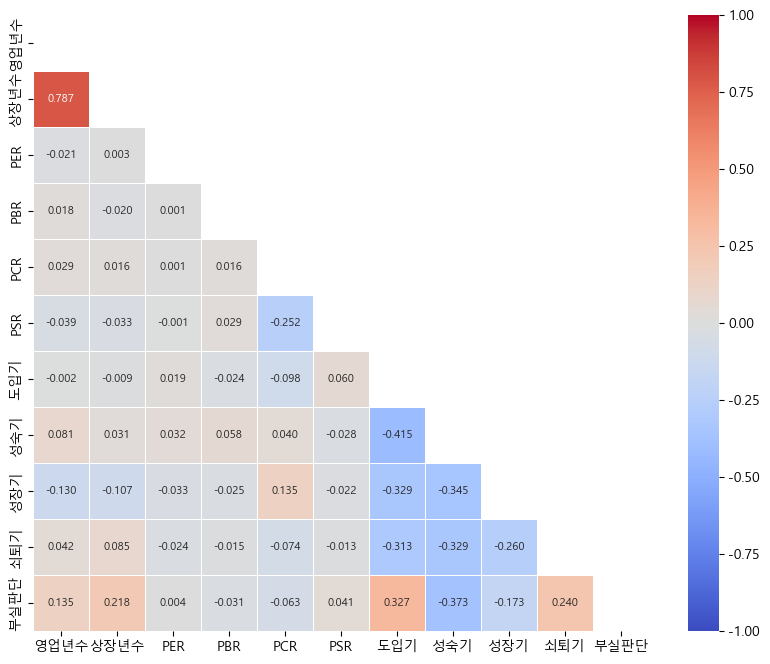

In [63]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(etc_ft1.corr(), dtype=bool))
sns.heatmap(etc_ft1.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask
)

In [64]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(etc_ft1)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
영업년수-상장년수: 0.787
영업년수-PER: -0.021
영업년수-PBR: 0.018
영업년수-PCR: 0.029
영업년수-PSR: -0.039
영업년수-도입기: -0.002
영업년수-성숙기: 0.081
영업년수-성장기: -0.130
영업년수-쇠퇴기: 0.042
영업년수-부실판단: 0.135
상장년수-PER: 0.003
상장년수-PBR: -0.020
상장년수-PCR: 0.016
상장년수-PSR: -0.033
상장년수-도입기: -0.009
상장년수-성숙기: 0.031
상장년수-성장기: -0.107
상장년수-쇠퇴기: 0.085
상장년수-부실판단: 0.218
PER-PBR: 0.001
PER-PCR: 0.001
PER-PSR: -0.001
PER-도입기: 0.019
PER-성숙기: 0.032
PER-성장기: -0.033
PER-쇠퇴기: -0.024
PER-부실판단: 0.004
PBR-PCR: 0.016
PBR-PSR: 0.029
PBR-도입기: -0.024
PBR-성숙기: 0.058
PBR-성장기: -0.025
PBR-쇠퇴기: -0.015
PBR-부실판단: -0.031
PCR-PSR: -0.252
PCR-도입기: -0.098
PCR-성숙기: 0.040
PCR-성장기: 0.135
PCR-쇠퇴기: -0.074
PCR-부실판단: -0.063
PSR-도입기: 0.060
PSR-성숙기: -0.028
PSR-성장기: -0.022
PSR-쇠퇴기: -0.013
PSR-부실판단: 0.041
도입기-성숙기: -0.415
도입기-성장기: -0.329
도입기-쇠퇴기: -0.313
도입기-부실판단: 0.327
성숙기-성장기: -0.345
성숙기-쇠퇴기: -0.329
성숙기-부실판단: -0.373
성장기-쇠퇴기: -0.260
성장기-부실판단: -0.173
쇠퇴기-부실판단: 0.240
p-value======================
영업년수-상장년수: 0.000
영업년수-PER: 0.579
영업년수-PBR: 0.632
영업년수-PCR

In [66]:
np.abs(etc_ft1.corr()['부실판단']).sort_values(ascending=False)

부실판단   1.000
성숙기    0.373
도입기    0.327
쇠퇴기    0.240
상장년수   0.218
성장기    0.173
영업년수   0.135
PCR    0.063
PSR    0.041
PBR    0.031
PER    0.004
Name: 부실판단, dtype: float64

전체

<Axes: >

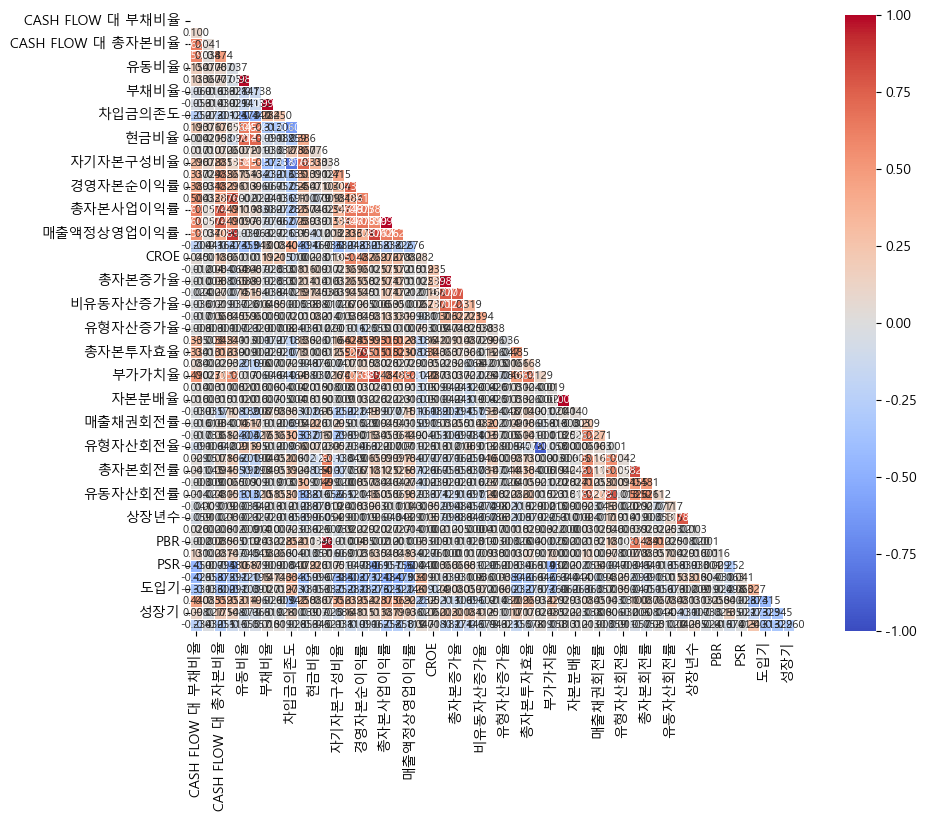

In [68]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(features.corr(), dtype=bool))
sns.heatmap(features.corr(), 
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'size' : 8}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
            square = True, # 차트를 정사각형으로 할 것인지
            cmap='coolwarm', 
            linewidths=.5, 
            mask = mask
)

In [69]:
# 안정성 피처 상관계수 및 p-value
# 상관 계수와 p-value 확인
correlations, p_values = correlation_and_pval(features)

print("상관 계수======================")
# 결과 출력 (상관 계수)
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

print("p-value======================")
# 결과 출력 (p-value)
for key, value in p_values.items():
    print(f"{key}: {value:.3f}")

상관 계수======================
CASH FLOW 대 부채비율-CASH FLOW 대 차입금비율: 0.100
CASH FLOW 대 부채비율-CASH FLOW 대 총자본비율: 0.626
CASH FLOW 대 부채비율-CASH FLOW 대 매출액비율: 0.594
CASH FLOW 대 부채비율-유동비율: 0.154
CASH FLOW 대 부채비율-당좌비율: 0.133
CASH FLOW 대 부채비율-부채비율: -0.060
CASH FLOW 대 부채비율-유동부채비율: -0.053
CASH FLOW 대 부채비율-차입금의존도: -0.252
CASH FLOW 대 부채비율-순운전자본비율: 0.193
CASH FLOW 대 부채비율-현금비율: 0.004
CASH FLOW 대 부채비율-유동자산구성비율: 0.017
CASH FLOW 대 부채비율-자기자본구성비율: 0.296
CASH FLOW 대 부채비율-자기자본순이익률: 0.337
CASH FLOW 대 부채비율-경영자본순이익률: 0.389
CASH FLOW 대 부채비율-매출액순이익률: 0.504
CASH FLOW 대 부채비율-총자본사업이익률: 0.610
CASH FLOW 대 부채비율-총자본정상영업이익률: 0.605
CASH FLOW 대 부채비율-매출액정상영업이익률: 0.532
CASH FLOW 대 부채비율-금융비용부담률: -0.204
CASH FLOW 대 부채비율-CROE: 0.045
CASH FLOW 대 부채비율-총자산증가율: -0.012
CASH FLOW 대 부채비율-총자본증가율: -0.010
CASH FLOW 대 부채비율-유동자산증가율: -0.024
CASH FLOW 대 부채비율-비유동자산증가율: -0.036
CASH FLOW 대 부채비율-매출액증가율: -0.017
CASH FLOW 대 부채비율-유형자산증가율: -0.008
CASH FLOW 대 부채비율-부가가치(백만원): 0.335
CASH FLOW 대 부채비율-총자본투자효율: 0.334
CASH FLOW 대 부채비율-설비투자효율: 0.084
CASH FLOW 대

In [70]:
np.abs(features.corr()['부실판단']).sort_values(ascending=False)

부실판단                1.000
총자본사업이익률            0.484
총자본정상영업이익률          0.479
CASH FLOW 대 부채비율    0.425
자기자본순이익률            0.402
자기자본구성비율            0.385
CASH FLOW 대 총자본비율   0.375
성숙기                 0.373
경영자본순이익률            0.371
순운전자본비율             0.359
부가가치(백만원)           0.346
차입금의존도              0.334
도입기                 0.327
매출액순이익률             0.321
금융비용부담률             0.319
매출액정상영업이익률          0.303
CASH FLOW 대 매출액비율   0.291
총자본투자효율             0.266
부가가치율               0.263
쇠퇴기                 0.240
유동비율                0.221
상장년수                0.218
당좌비율                0.195
성장기                 0.173
부채비율                0.147
유동부채비율              0.140
영업년수                0.135
현금비율                0.096
매출채권회전률             0.094
경영자본회전률             0.093
총자본회전률              0.091
유동자산구성비율            0.073
PCR                 0.063
CASH FLOW 대 차입금비율   0.058
유형자산회전율             0.052
비유동자산회전률            0.051
설비투자효율              0.046
자본분배율               0.044
이윤분배율       